In [2]:
import numpy as np
import scipy as sp
from tqdm import tqdm
import matplotlib.pyplot as plt 

array([ 0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,
        0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,
        0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0., -0., -0.])

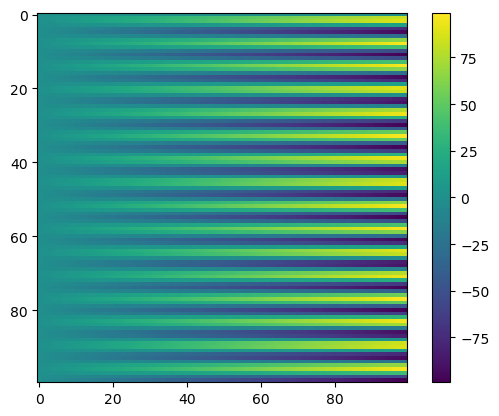

In [9]:
def f(t, x, y):
    return np.exp(-t) * np.sin(x)*y

a = np.fromfunction(f, (10, 10, 10), dtype=float)
np.diff(a, axis=1)

In [3]:
nu = 10/3
gamma = 50/3
eta = 3.5

def f(state, p):
    b, w = state

    L2 = np.power(1+eta*b, 2)
    Gb = nu*w*L2
    Gw = gamma*b*L2

    r0 = Gb*b*(1-b) - b 
    r1 = p - nu*w - Gw*w

    return np.array([r0, r1])

In [13]:
ps = np.linspace(0, 10, 128)
N = 10
guess = np.array([1, 0])
results = []
for p in ps:
    results.append(sp.optimize.root(f, guess, args=p).x)
results = np.array(results)

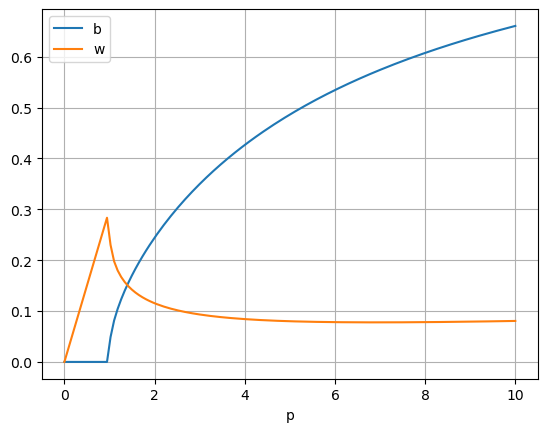

In [20]:
bs = results[:, 0]
ws = results[:, 1]

cws = ps / nu
plt.plot(ps, bs, label="b")
plt.xlabel("p")
# plt.ylabel("b")
plt.grid()
# plt.plot(ps, cws)
plt.plot(ps, ws, label="w")
plt.legend()

In [21]:
sp.optimize.root(f, guess, args=1.001).x

array([0.03228617, 0.25025498])